In [1]:
#Keras & a sample of the Quickdraw dataset to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# use Sequential w/ Dense for single cell forward feeding NNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# load in data set
data = np.load('../quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']


print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


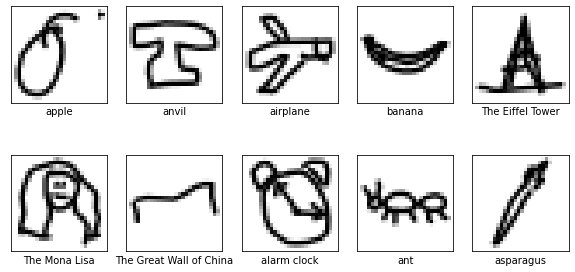

In [4]:
class_names = ['apple',
             'anvil',
             'airplane',
             'banana',
             'The Eiffel Tower',
             'The Mona Lisa',
             'The Great Wall of China',
             'alarm clock',
             'ant',
             'asparagus']


plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [5]:
#shuffle and shape confirm
#28 * 28 Pixel = 784 
X, y = shuffle(X, y)
X.shape

(100000, 784)

In [6]:
# get dim of image row vectors and save to imput_dim
input_dim = X.shape[1]


# get number of unique labels and save to n_output_nodels, 10
n_output_nodels = len(np.unique(y))

# normalize image data to values between 0 and 1 (by dividing by max pixel value)
X_scaled = X / X.max()


print(f'{input_dim}, dimensions of X input. {n_output_nodels}, unique labels for classifier. {X_scaled.max()}, normalize max values')



784, dimensions of X input. 10, unique labels for classifier. 1.0, normalize max values


In [7]:
# instantiate a sequential object and call it model, then add layers to your model
model = Sequential()

#hidden layer
model.add(Dense(500, activation="sigmoid", input_dim=input_dim))
model.add(Dense(250, activation="sigmoid"))
model.add(Dense(100, activation="sigmoid"))
model.add(Dense(n_output_nodels, activation="softmax"))


model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])




In [8]:
n_layers = len(model.get_config()["layers"])
assert n_layers == 5, "You should have 5 layers: input, h1, h2, h3, and output"

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [10]:
epochs = 20

In [11]:
# fit  model and save training resuts to history 
history = model.fit(X_scaled, y, 
                    epochs=epochs, 
                    # test set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 27s 10ms/step - loss: 2.2927 - accuracy: 0.1355 - val_loss: 2.2739 - val_accuracy: 0.3052
Epoch 2/20
2500/2500 [==============================] - 19s 8ms/step - loss: 2.2292 - accuracy: 0.2763 - val_loss: 2.1451 - val_accuracy: 0.2887
Epoch 3/20
2500/2500 [==============================] - 17s 7ms/step - loss: 1.9355 - accuracy: 0.4133 - val_loss: 1.7610 - val_accuracy: 0.5020
Epoch 4/20
2500/2500 [==============================] - 17s 7ms/step - loss: 1.5953 - accuracy: 0.5103 - val_loss: 1.4594 - val_accuracy: 0.5530
Epoch 5/20
2500/2500 [==============================] - 17s 7ms/step - loss: 1.3411 - accuracy: 0.5818 - val_loss: 1.2685 - val_accuracy: 0.6137
Epoch 6/20
2500/2500 [==============================] - 19s 7ms/step - loss: 1.1850 - accuracy: 0.6328 - val_loss: 1.1416 - val_accuracy: 0.6514
Epoch 7/20
2500/2500 [==============================] - 20s 8ms/step - loss: 1.0739 - accuracy: 0.6719 - val_loss: 1.0506 - val_a

In [15]:
#Now to Visualize NN
df = pd.DataFrame(history.history) 
epochs = list(range(0, df.shape[0]))
df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.292694,0.135475,2.273905,0.30520
1,2.229227,0.276338,2.145108,0.28870
2,1.935526,0.413312,1.761034,0.50205
3,1.595271,0.510350,1.459358,0.55305
4,1.341119,0.581762,1.268467,0.61370


[Text(0.5, 0, 'epochs'), Text(0, 0.5, 'Accuracy')]

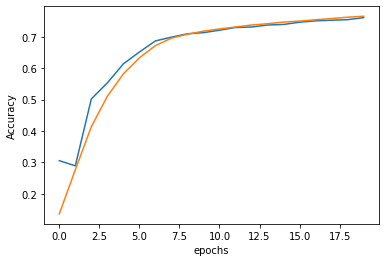

In [14]:
ax = sns.lineplot(data=df, x=epochs, y="val_accuracy")
ax = sns.lineplot(data=df, x=epochs, y="accuracy")
ax.set(xlabel='epochs', ylabel='Accuracy')


[Text(0.5, 0, 'epochs'), Text(0, 0.5, 'loss')]

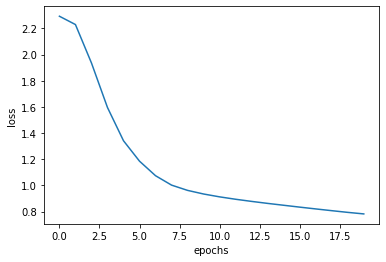

In [16]:
loss = sns.lineplot(data=df, x=epochs, y="loss")
loss.set(xlabel='epochs', ylabel='loss')

In [17]:
# attempt to get better performance with different optimizer ADAM

In [19]:
# train same model as above but use sgd if you used adam previously ( or use adam if you used sgd previously)

# YOUR CODE HERE
# instantiate a sequential object and call it model, then add layers to your model
model = Sequential()

#hidden layer
model.add(Dense(500, activation="sigmoid", input_dim=input_dim))
model.add(Dense(250, activation="sigmoid"))
model.add(Dense(100, activation="sigmoid"))
model.add(Dense(n_output_nodels, activation="softmax"))

# add a compile layer but don't fit your model yet 
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# fit your model and save training resuts to history 
history = model.fit(X_scaled, y, 
                    epochs=20, 
                    # test set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 21s 8ms/step - loss: 0.7547 - accuracy: 0.7645 - val_loss: 0.5720 - val_accuracy: 0.8255
Epoch 2/20
2500/2500 [==============================] - 20s 8ms/step - loss: 0.4951 - accuracy: 0.8487 - val_loss: 0.4931 - val_accuracy: 0.8476
Epoch 3/20
2500/2500 [==============================] - 19s 8ms/step - loss: 0.4148 - accuracy: 0.8731 - val_loss: 0.4370 - val_accuracy: 0.8652
Epoch 4/20
2500/2500 [==============================] - 19s 8ms/step - loss: 0.3555 - accuracy: 0.8922 - val_loss: 0.4299 - val_accuracy: 0.8684
Epoch 5/20
2500/2500 [==============================] - 20s 8ms/step - loss: 0.3090 - accuracy: 0.9063 - val_loss: 0.4357 - val_accuracy: 0.8705
Epoch 6/20
2500/2500 [==============================] - 19s 8ms/step - loss: 0.2719 - accuracy: 0.9178 - val_loss: 0.4217 - val_accuracy: 0.8774
Epoch 7/20
2500/2500 [==============================] - 20s 8ms/step - loss: 0.2386 - accuracy: 0.9275 - val_loss: 0.4270 - val_ac

In [20]:
# a check that the correct optimizer in this model
opt_name = model.optimizer.get_config()["name"]
assert opt_name == "Adam", "use adam for the optimizer in this model."

[Text(0.5, 0, 'epochs'), Text(0, 0.5, 'Accuracy')]

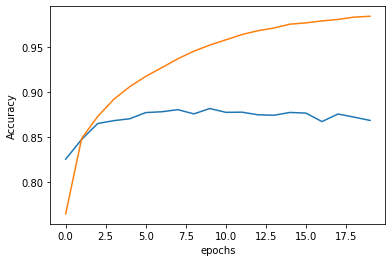

In [21]:
# YOUR CODE HERE

df2 = pd.DataFrame(history.history) 
epochs = list(range(0, df.shape[0]))

ax = sns.lineplot(data=df2, x=epochs, y="val_accuracy")
ax = sns.lineplot(data=df2, x=epochs, y="accuracy")
ax.set(xlabel='epochs', ylabel='Accuracy')


